<a href="https://colab.research.google.com/github/Fcazarez/RRC3_NNandDL_Ass5_Stock_Prediction/blob/main/Assignment_5_Stock_Price_Predictions_FFE_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### COMP-3704 (241552) Neural Networks and Deep Learning
### Assignment 5 - Stock Price Predictions
### Group 3 - Francisco, Felix, Elizer

Instructions
* Objective:
To build a time sequence model for predicting short term future stock prices from historical data.

Problem Statement:
* An investment company is interested in learning about the potential profit in frequent buy/sell stock transactions. You are tasked with developing a time sequence model to predict the price two days ahead based on recent prices. Choose four (or more) of the data files for training and a separate two for validation. Once the model is finalized, demonstrate how well your model makes predictions by using two other data files for testing.

Data:
* Historical stock price data on US-based stocks, last updated in 2017. The dataset is available at Huge Stock Market Dataset | Kaggle and is provided by Boris Marjanovic. A list of stock ticker symbols is available at List of All Stock Ticker Symbols - Stock Analysis, to help identify the name of the stock from the txt file name.

## 1. Data
* a.] Select four (or more) of the data files in stocks.zip to use as training data, two others for validation, and two others for testing.

* d.] Use the function created in the previous step to load all of the data files into 2d numpy arrays

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#from prettytable import PrettyTable

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [2]:
#Training data
# The Boeing Company (BA) Stock Price History
inp0 = pd.read_csv("https://raw.githubusercontent.com/ElizerLising/NeuralNetworksDeepLearning/main/ba.us.txt", index_col='Date')
# Caterpillar Inc. (CAT) Stock Price History
inp1 = pd.read_csv("https://raw.githubusercontent.com/ElizerLising/NeuralNetworksDeepLearning/main/cat.us.txt", index_col='Date')
# The Walt Disney Company (DIS) Stock Price History
inp2 = pd.read_csv("https://raw.githubusercontent.com/ElizerLising/NeuralNetworksDeepLearning/main/dis.us.txt",index_col='Date')
# General Electric Company (GE) Stock Price History
inp3 = pd.read_csv("https://raw.githubusercontent.com/ElizerLising/NeuralNetworksDeepLearning/main/ge.us.txt",index_col='Date')

# Validation data
# Halliburton Company (HAL) Stock Price History
inp4 = pd.read_csv("https://raw.githubusercontent.com/ElizerLising/NeuralNetworksDeepLearning/main/hal.us.txt",index_col='Date')
# Hp Inc. (HPQ) Stock Price History
inp5= pd.read_csv("https://raw.githubusercontent.com/ElizerLising/NeuralNetworksDeepLearning/main/hpq.us.txt",index_col='Date')

# Testing data
# (IBM) International Business Machines Corporation Stock Price History
inp6 = pd.read_csv("https://raw.githubusercontent.com/ElizerLising/NeuralNetworksDeepLearning/main/ibm.us.txt",index_col='Date')
# 3M Company (MMM) Stock Price History
inp7 = pd.read_csv("https://raw.githubusercontent.com/ElizerLising/NeuralNetworksDeepLearning/main/mmm.us.txt",index_col='Date')

In [3]:
# Training data (head)
print("Boeing Company (BA) Stock Price History")
print(inp0.head())
print("-" * 30 + "-" + "-" * 30)
print("Caterpillar Inc. (CAT) Stock Price History")
print(inp1.head())
print("-" * 30 + "-" + "-" * 30)
print("Walt Disney Company (DIS) Stock Price History")
print(inp2.head())
print("-" * 30 + "-" + "-" * 30)
print("General Electric Company (GE) Stock Price History")
print(inp3.head())

# Validation data (head)
print("-" * 30 + "-" + "-" * 30)
print("Halliburton Company (HAL) Stock Price History")
print(inp4.head())

print("-" * 30 + "-" + "-" * 30)
print("Hp Inc. (HPQ) Stock Price History")
print(inp5.head())

# testing data (head)
print("-" * 30 + "-" + "-" * 30)
print("(IBM) International Business Machines Corporation Stock Price History")
print(inp6.head())

print("-" * 30 + "-" + "-" * 30)
print("3M Company (MMM) Stock Price History")
print(inp7.head())

Boeing Company (BA) Stock Price History
              Open    High     Low   Close   Volume  OpenInt
Date                                                        
1970-01-02  0.7587  0.8092  0.7587  0.8092   753088        0
1970-01-05  0.8263  0.8429  0.8263  0.8345   879203        0
1970-01-06  0.8429  0.8598  0.8429  0.8429  1607067        0
1970-01-07  0.8429  0.8598  0.8429  0.8512   767501        0
1970-01-08  0.8512  0.8512  0.8263  0.8429   958476        0
-------------------------------------------------------------
Caterpillar Inc. (CAT) Stock Price History
              Open    High     Low   Close  Volume  OpenInt
Date                                                       
1970-01-02  1.9382  1.9382  1.8802  1.8883  333249        0
1970-01-05  1.8883  1.9050  1.8802  1.8802  124609        0
1970-01-06  1.8802  1.8802  1.8304  1.8387  127500        0
1970-01-07  1.8223  1.8223  1.7724  1.7810  243418        0
1970-01-08  1.7810  1.8223  1.7724  1.7889  392651        0
--------

In [4]:
# Training data (tail)
print("Boeing Company (BA) Stock Price History")
print(inp0.tail())
print("-" * 30 + "-" + "-" * 30)
print("Caterpillar Inc. (CAT) Stock Price History")
print(inp1.tail())
print("-" * 30 + "-" + "-" * 30)
print("Walt Disney Company (DIS) Stock Price History")
print(inp2.tail())
print("-" * 30 + "-" + "-" * 30)
print("General Electric Company (GE) Stock Price History")
print(inp3.tail())

# Validation data (head)
print("-" * 30 + "-" + "-" * 30)
print("Halliburton Company (HAL) Stock Price History")
print(inp4.tail())
print("-" * 30 + "-" + "-" * 30)
print("Hp Inc. (HPQ) Stock Price History")
print(inp5.tail())

# testing data (head)
print("-" * 30 + "-" + "-" * 30)
print("(IBM) International Business Machines Corporation Stock Price History")
print(inp6.tail())
print("-" * 30 + "-" + "-" * 30)
print("3M Company (MMM) Stock Price History")
print(inp7.tail())

Boeing Company (BA) Stock Price History
              Open    High      Low   Close   Volume  OpenInt
Date                                                         
2017-11-06  261.22  264.42  261.130  262.66  2925355        0
2017-11-07  262.66  265.85  262.660  264.71  3222444        0
2017-11-08  264.72  266.19  263.870  264.15  2856722        0
2017-11-09  265.01  266.75  259.563  262.70  3215482        0
2017-11-10  262.11  262.50  259.600  260.85  1740256        0
-------------------------------------------------------------
Caterpillar Inc. (CAT) Stock Price History
              Open    High     Low   Close   Volume  OpenInt
Date                                                        
2017-11-06  136.80  138.45  136.80  137.71  2779289        0
2017-11-07  137.80  138.90  136.66  138.81  3221906        0
2017-11-08  138.40  138.75  137.18  137.29  1932825        0
2017-11-09  136.44  136.75  134.65  135.34  2940672        0
2017-11-10  135.09  136.89  135.07  136.48  2017639    

In [5]:
# create a dict of dataframes
dfs = {
    'BA': ['Boeing Company (BA)', inp0],
    'CAT': ['Caterpillar Inc. (CAT)', inp1],
    'DIS': ['Walt Disney Company (DIS)', inp2],
    'GE': ['General Electric Company (GE)', inp3],
    'HAL': ['Halliburton Company (HAL)', inp4],
    'HP': ['Hp Inc. (HPQ)', inp5],
    'IBM': ['(IBM) International Business Machines Corporation', inp6],
    '3M': ['3M Company (MMM) Stock Price History', inp7]}

In [6]:
# Training data (shape)
print("Boeing Company (BA) Stock Price History")
print(inp0.shape)
print("-" * 30 + "-" + "-" * 30)
print("Caterpillar Inc. (CAT) Stock Price History")
print(inp1.shape)
print("-" * 30 + "-" + "-" * 30)
print("Walt Disney Company (DIS) Stock Price History")
print(inp2.shape)
print("-" * 30 + "-" + "-" * 30)
print("General Electric Company (GE) Stock Price History")
print(inp3.shape)

# Validation data (head)
print("-" * 30 + "-" + "-" * 30)
print("Halliburton Company (HAL) Stock Price History")
print(inp4.shape)
print("-" * 30 + "-" + "-" * 30)
print("Hp Inc. (HPQ) Stock Price History")
print(inp5.shape)

# testing data (head)
print("-" * 30 + "-" + "-" * 30)
print("(IBM) International Business Machines Corporation Stock Price History")
print(inp6.shape)
print("-" * 30 + "-" + "-" * 30)
print("3M Company (MMM) Stock Price History")
print(inp7.shape)

Boeing Company (BA) Stock Price History
(12074, 6)
-------------------------------------------------------------
Caterpillar Inc. (CAT) Stock Price History
(12075, 6)
-------------------------------------------------------------
Walt Disney Company (DIS) Stock Price History
(12072, 6)
-------------------------------------------------------------
General Electric Company (GE) Stock Price History
(14058, 6)
-------------------------------------------------------------
Halliburton Company (HAL) Stock Price History
(9043, 6)
-------------------------------------------------------------
Hp Inc. (HPQ) Stock Price History
(12075, 6)
-------------------------------------------------------------
(IBM) International Business Machines Corporation Stock Price History
(14059, 6)
-------------------------------------------------------------
3M Company (MMM) Stock Price History
(12075, 6)


* b.] Plot the closing price in each data file using dates to label the x-axis.

In [7]:
pip install plotly

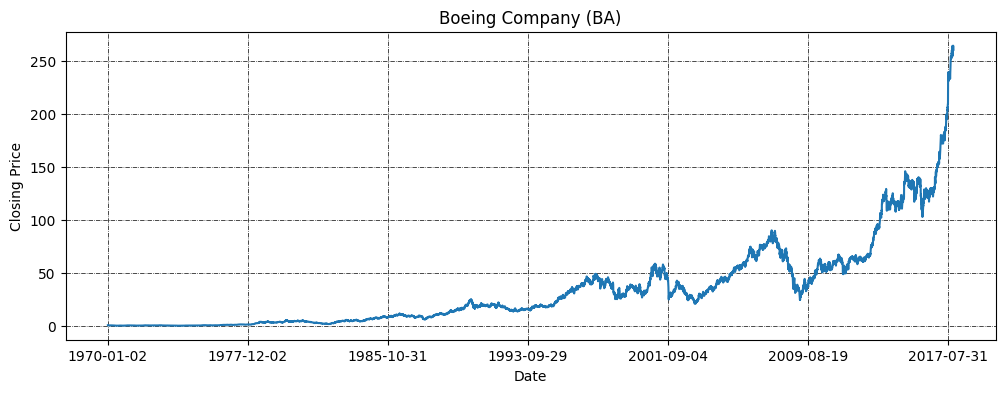

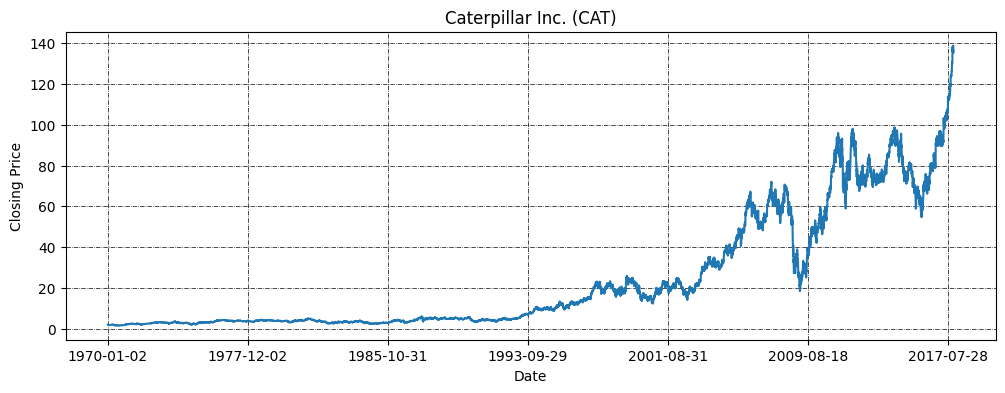

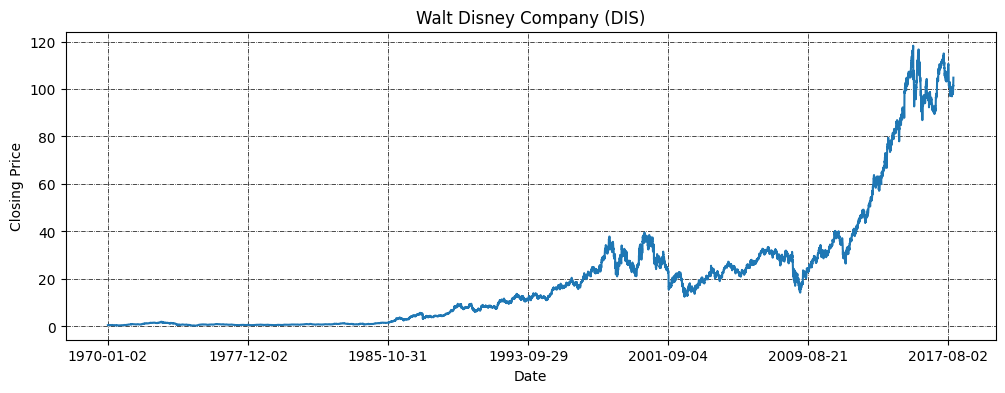

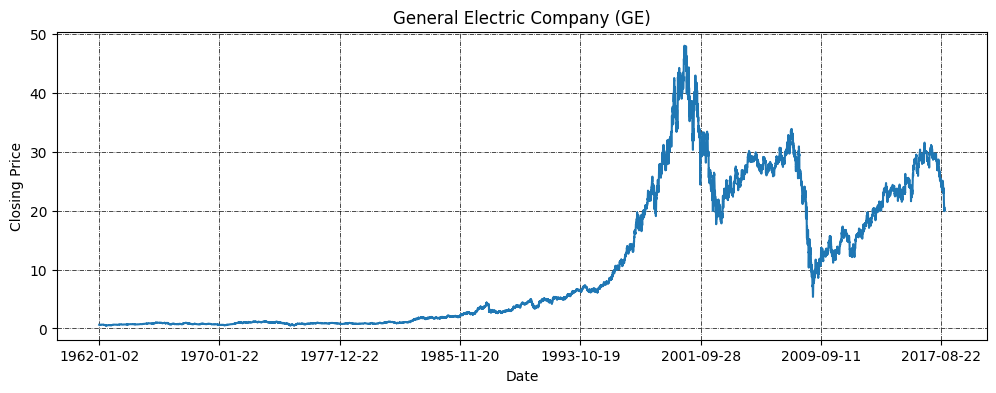

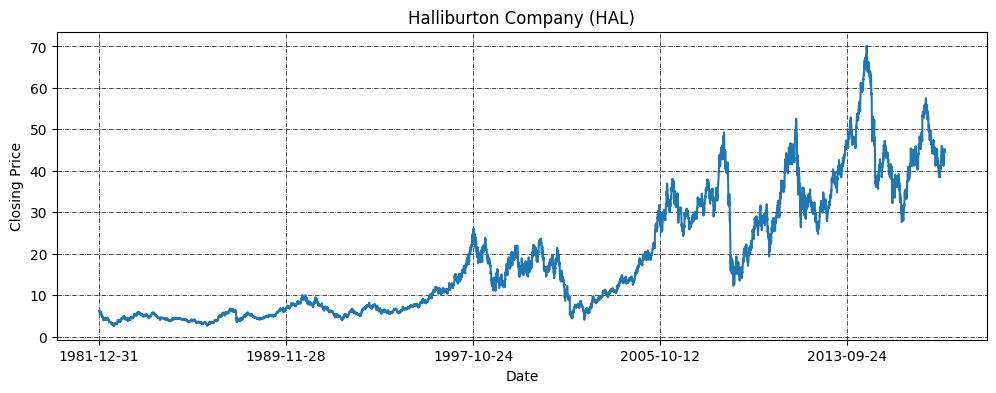

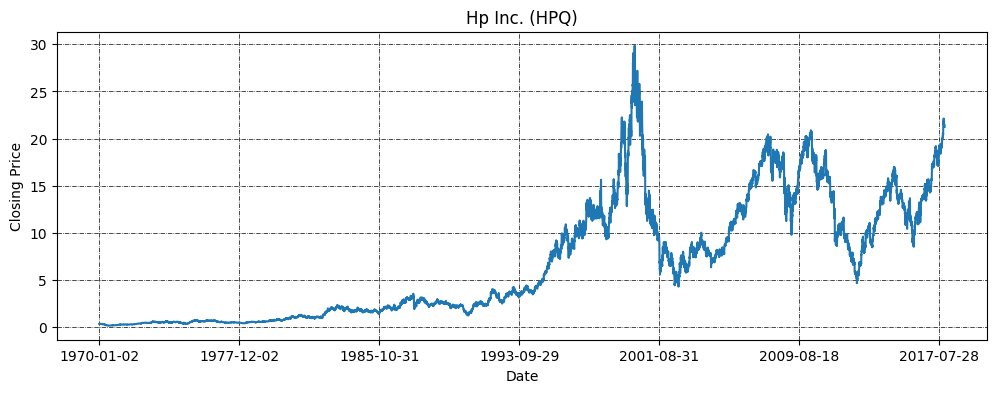

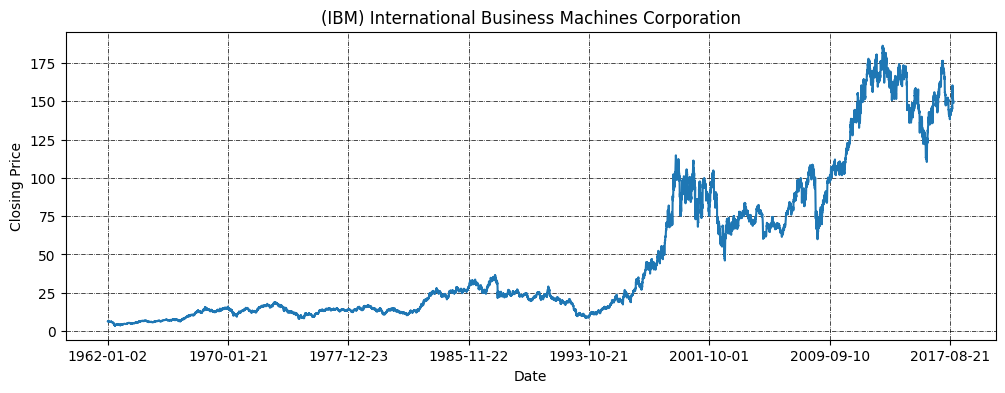

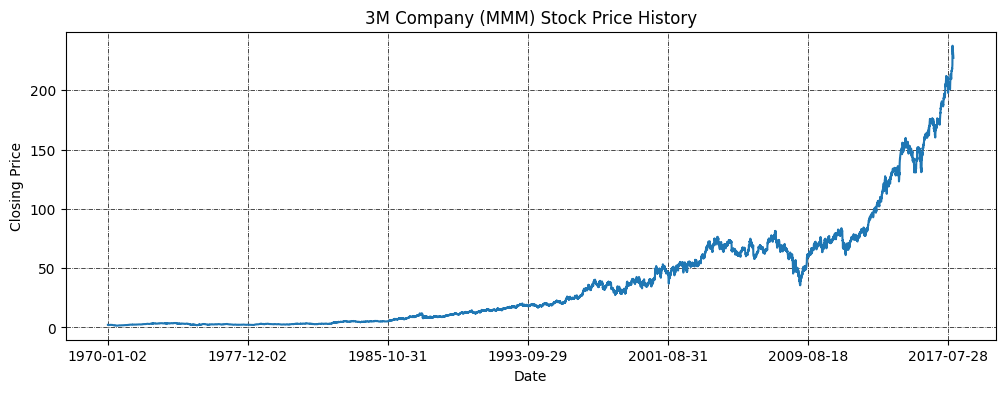

In [8]:
# plot the closing price for each stock
for i, inp in enumerate([inp0, inp1, inp2, inp3, inp4, inp5, inp6, inp7]):

    inp['Close'].plot(figsize=(12,4))

    plt.title(dfs[list(dfs.keys())[i]][0])
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(which='major', color='k', linestyle='-.', linewidth=0.5)
    plt.show()

In [9]:
import plotly.graph_objs as go

# Create a list of traces for each stock
traces = []
for i, inp in enumerate([inp0, inp1, inp2, inp3, inp4, inp5, inp6, inp7]):
    trace = go.Scatter(x=inp.index, y=inp['Close'], name=dfs[list(dfs.keys())[i]][0])
    traces.append(trace)

# Create layout for the chart
layout = go.Layout(title='Closing Prices for Each Stock', xaxis=dict(title='Date'), yaxis=dict(title='Closing Price'))

# Create figure and plot the chart
fig = go.Figure(data=traces, layout=layout)
fig.show()


* c.] Create a function that loads the closing prices from a data file into numpy arrays that are appropriate for training time sequence models to predict a price two days into the future, using a lookback value of your choice.

In [10]:
def get_lookback(inp, look_back, predict_days):
    y = pd.DataFrame(inp)
    dataX = [y.shift(i) for i in range(predict_days, look_back+predict_days)]
    dataX = pd.concat(dataX, axis=1)
    dataX.fillna(0, inplace = True)
    return dataX.values, y.values

# setup the lookback and predict forward
look_back = 10
predict_days = 2

d.] Use the function created in the previous step to load all of the data files into 2d numpy arrays.

In [11]:
# extracting the values of the closing price for each stock
ts_data_inp0 = inp0['Close'].values.reshape(-1,1)
ts_data_inp1 = inp1['Close'].values.reshape(-1,1)
ts_data_inp2 = inp2['Close'].values.reshape(-1,1)
ts_data_inp3 = inp3['Close'].values.reshape(-1,1)
ts_data_inp4 = inp4['Close'].values.reshape(-1,1)
ts_data_inp5 = inp5['Close'].values.reshape(-1,1)
ts_data_inp6 = inp6['Close'].values.reshape(-1,1)
ts_data_inp7 = inp7['Close'].values.reshape(-1,1)

In [12]:
# scale the data
scaler = MinMaxScaler()

# first input we will use .fit_transform
inp0_scaled = scaler.fit_transform(inp0.Close.values.reshape(-1,1))

# the rest we will use .transform
inp1_scaled = scaler.transform(inp1.Close.values.reshape(-1,1))
inp2_scaled = scaler.transform(inp2.Close.values.reshape(-1,1))
inp3_scaled = scaler.transform(inp3.Close.values.reshape(-1,1))
inp4_scaled = scaler.transform(inp4.Close.values.reshape(-1,1))
inp5_scaled = scaler.transform(inp5.Close.values.reshape(-1,1))
inp6_scaled = scaler.transform(inp6.Close.values.reshape(-1,1))
inp7_scaled = scaler.transform(inp7.Close.values.reshape(-1,1))

In [13]:
# create a function to scale the data and load the data
def prep_data(X, y, list, look_back, predict_days):
    for i, inp in enumerate(list):
        dataX, datay = get_lookback(inp, look_back, predict_days, )
        # append the data
        X = np.append(X, dataX, axis=0)
        y = np.append(y, datay, axis=0)
    # print the shape
    print("-" * 10 + " RESULTS " + "-" * 10)
    print(f'shape: {X.shape}, {y.shape}')
    return X, y

In [14]:
# Training data
# setup the training data list
train_data = [inp0_scaled, inp1_scaled, inp2_scaled, inp3_scaled]

# train data
X_train = np.empty((0, look_back))
y_train = np.empty((0, 1))

X_train, y_train = prep_data(X_train, y_train, train_data, look_back=look_back, predict_days=predict_days)

---------- RESULTS ----------
shape: (50279, 10), (50279, 1)


In [15]:
# Validation data
# setup the validation data list
val_data = [inp4_scaled, inp5_scaled]

# validation data
X_val = np.empty((0, look_back))
y_val = np.empty((0, 1))

X_val, y_val = prep_data(X_val, y_val, val_data, look_back=look_back, predict_days=predict_days)


---------- RESULTS ----------
shape: (21118, 10), (21118, 1)


In [16]:
# Test data
# setup the training, validation and testing data list
test_data = [inp6_scaled, inp7_scaled]

# test data
X_test = np.empty((0, look_back))
y_test = np.empty((0, 1))

X_test, y_test = prep_data(X_test, y_test, test_data, look_back=look_back, predict_days=predict_days)

---------- RESULTS ----------
shape: (26134, 10), (26134, 1)


## 2. Modeling
* a.] Create and compile a time sequence model using tf.keras.Sequential. Use at least one Conv1d layer, one SimpleRNN layer, and one Dropout layer. Use mean_squared_error for the loss.

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Activation, Dropout, Dense, Reshape, Conv1D, MaxPooling1D, Flatten

In [18]:

# instantiate the Sequential model
mod_1 = Sequential()
mod_1.add(Reshape((look_back,1), input_shape = (look_back,)))
mod_1.add(Conv1D(32, 3, activation='relu'))
mod_1.add(MaxPooling1D(2))
mod_1.add(SimpleRNN(32))
mod_1.add(Dropout(0.2))
mod_1.add(Dense(1))
mod_1.add(Activation('linear'))


In [19]:

# Compile the model
mod_1.compile(loss='mean_squared_error', optimizer='adam')
# show the model summary
mod_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 10, 1)             0         
                                                                 
 conv1d (Conv1D)             (None, 8, 32)             128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 4, 32)             0         
 D)                                                              
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                        

* b.] Train the model on the training data without using a validation split. Calculate and record the training loss.

In [20]:
# fit the model

history_1 = mod_1.fit(X_train, y_train, epochs=20, batch_size=42)

Epoch 1/20
1198/1198 [==============================] - 10s 7ms/step - loss: 3.4644e-04
Epoch 2/20
1198/1198 [==============================] - 10s 8ms/step - loss: 1.5674e-04
Epoch 3/20
1198/1198 [==============================] - 9s 7ms/step - loss: 1.4336e-04
Epoch 4/20
1198/1198 [==============================] - 7s 6ms/step - loss: 1.5772e-04
Epoch 5/20
1198/1198 [==============================] - 4s 3ms/step - loss: 1.4026e-04
Epoch 6/20
1198/1198 [==============================] - 5s 4ms/step - loss: 1.3688e-04
Epoch 7/20
1198/1198 [==============================] - 4s 3ms/step - loss: 1.3498e-04
Epoch 8/20
1198/1198 [==============================] - 4s 3ms/step - loss: 1.4170e-04
Epoch 9/20
1198/1198 [==============================] - 5s 4ms/step - loss: 1.4025e-04
Epoch 10/20
1198/1198 [==============================] - 4s 4ms/step - loss: 1.3849e-04
Epoch 11/20
1198/1198 [==============================] - 4s 3ms/step - loss: 1.3778e-04
Epoch 12/20
1198/1198 [================

In [21]:
def get_train_loss(history, results_dict, key):
    # get the training loss
    loss_train = history.history['loss'][-1]
    # append to the model results
    results_dict[key] = {'train_loss': loss_train}
    # print the training loss
    print(f'Training loss ({key}): {loss_train:.6f}')
# create a dict for the model results
model_results = {}
get_train_loss(history_1, model_results, 'mod_1')

Training loss (mod_1): 0.000132


c.] Use the model to make predictions on the validation data.
* Calculate and record the validation loss.
* Create scatter plots of the validation data that show the true price as well as the model predictions

In [22]:
# make predictions on the validation data
y_pred_1_val = mod_1.predict(X_val)

# append the predictions to the model results
model_results['mod_1']['y_pred_val'] = y_pred_1_val

660/660 [==============================] - 2s 2ms/step


In [23]:
y_pred_1_val.shape

(21118, 1)

In [24]:

# create a function to get the validation loss
def get_val_loss(X_val, y_val, model, results_dict, key):
    # get the validation loss
    loss_val = mod_1.evaluate(X_val, y_val, verbose=42)
    # append to the model results
    results_dict[key]['val_loss'] = loss_val
    # print the validation loss
    print(f'Validation loss ({key}): {loss_val:.8f}')

# get the validation loss
get_val_loss(X_val, y_val, mod_1, model_results, 'mod_1')

Validation loss (mod_1): 0.00000671


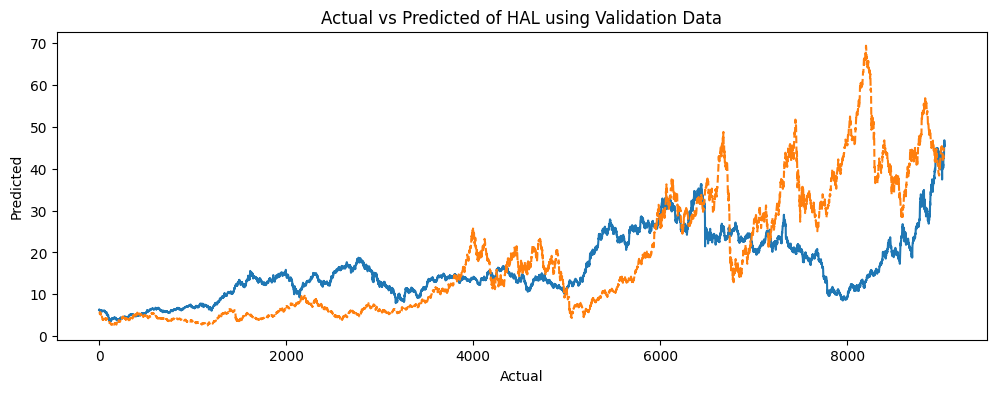

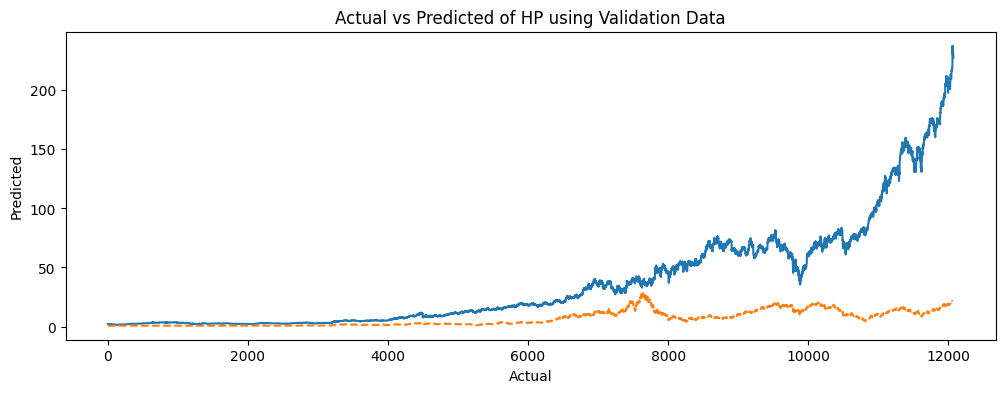

In [25]:
# create a function to plot actual vs predicted values for the validation data
def avp_plot_val(list, y_pred):
    # get the predictions
    testPredict = scaler.inverse_transform(y_pred)

    # split the predictions and put to list
    testPredict_list = [testPredict[:len(list[0])], testPredict[len(list[0]):]]

    print(len(testPredict[:len(list[0])]))
    print(len(ts_data_inp6))
    print(len(testPredict[len(list[0]):]))
    print(len(ts_data_inp7))

    # setup the model name
    stock_name = ['HAL', 'HP']

    # plot the actual vs predicted values
    # restrict the length of first data to compare
    ts_data_inp6_cut = ts_data_inp6[:len(testPredict[:len(list[0])])]

    for i, ts_data_inp  in enumerate([ts_data_inp6_cut, ts_data_inp7]):

        # construct the predicted plot
        pred_test_plot = ts_data_inp.copy()

        #pred_test_plot[:look_back, :] = np.nan
        pred_test_plot = testPredict_list[i][look_back:]

        fig, ax = plt.subplots(figsize=(12,4))

        plt.plot(ts_data_inp)
        plt.plot(pred_test_plot, "--")
        ax.set_xlabel('Actual')
        ax.set_ylabel('Predicted')
        ax.set_title(f'Actual vs Predicted of {stock_name[i]} using Validation Data')

        plt.show()

# plot the actual vs predicted values for the validation data
avp_plot_val(val_data, y_pred_1_val)


d.] Revisit the previous steps to make at least three models in total by changing architecture and hyperparameters.

In [20]:
# Code here

e.] Once you are finished altering hyperparameters, present neatly the training and validation loss along with the scatter plots for each model showing predicted prices and actual prices. Choose the best model by comparing how each model did on training and validation data; provide your reasoning in markdown.

In [ ]:
# Code here

f. ] With the best model, make predictions on the testing data; calculate the testing loss and present a scatter plot of the predictions along with the true values.

In [ ]:
# Code here

## 3. Discussion
* a.] Select the best model based on quantitative metrics and plots. Consider zooming-in on problem areas when comparing performance. Justify your selection using markdown.

In [ ]:
# Code here

* b.] Use markdown to describe how well you feel your model would work to predict closing stock prices two days into the future. Give a quantitative estimate of the error in the predictions.